In [79]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron, LinearRegression, LogisticRegression
from tensorflow import keras  # keras.__version__ 2.8.0
from tensorflow.keras import layers
from keras_visualizer import visualizer
from IPython.display import display, Image

mpl.rc("font", family="Malgun Gothic")
mpl.rc("axes", unicode_minus=False)
%matplotlib inline

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')
print(f"{df.shape = }")
print(f"{df.columns = }")
df.head()

df.shape = (1599, 12)
df.columns = Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [14]:
df["quality"].nunique(), df['quality'].unique()

(6, array([5, 6, 7, 4, 8, 3], dtype=int64))

In [20]:
df["quality"].value_counts(()).sort_index()

3     10
4     53
5    681
6    638
7    199
8     18
Name: quality, dtype: int64

In [21]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [25]:
keras.__version__

'2.8.0'

In [57]:
# Create training and validation splits
df_train = df.sample(frac=0.8, random_state=0)
df_valid = df.drop(df_train.index)
display(df_train.head(4))

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1109,10.8,0.470,0.43,2.10,0.171,27.0,66.0,0.99820,3.17,0.76,10.8,6
1032,8.1,0.820,0.00,4.10,0.095,5.0,14.0,0.99854,3.36,0.53,9.6,5
1002,9.1,0.290,0.33,2.05,0.063,13.0,27.0,0.99516,3.26,0.84,11.7,7
487,10.2,0.645,0.36,1.80,0.053,5.0,14.0,0.99820,3.17,0.42,10.0,6


In [58]:
len(df), len(df_train), len(df_valid),len(df_train) + len(df_valid), round(len(df_valid)/len(df_train), 2)

(1599, 1279, 320, 1599, 0.25)

In [59]:
# Scale to [0, 1]
max_ = df_train.max(axis=0)  # 각 컬럼별로 max 값을 구하고 Series에 저장
min_ = df_train.min(axis=0)
df_train = (df_train - min_) / (max_ - min_)
df_valid = (df_valid - min_) / (max_ - min_)

In [68]:
df["quality"].max(), df["quality"].min(), (8-3)/(8-3), (3-3)/(8-3)

(8, 3, 1.0, 0.0)

In [61]:
display(type(min_))
min_

pandas.core.series.Series

fixed acidity           4.60000
volatile acidity        0.12000
citric acid             0.00000
residual sugar          0.90000
chlorides               0.01200
free sulfur dioxide     1.00000
total sulfur dioxide    6.00000
density                 0.99007
pH                      2.87000
sulphates               0.33000
alcohol                 8.40000
quality                 3.00000
dtype: float64

In [62]:
df_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1109,0.548673,0.239726,0.544304,0.092308,0.265442,0.366197,0.212014,0.619193,0.263158,0.260606,0.369231,0.6
1032,0.309735,0.479452,0.000000,0.246154,0.138564,0.056338,0.028269,0.645088,0.429825,0.121212,0.184615,0.4
1002,0.398230,0.116438,0.417722,0.088462,0.085142,0.169014,0.074205,0.387662,0.342105,0.309091,0.507692,0.8
487,0.495575,0.359589,0.455696,0.069231,0.068447,0.056338,0.028269,0.619193,0.263158,0.054545,0.246154,0.6
979,0.672566,0.226027,0.620253,0.038462,0.105175,0.028169,0.000000,0.520183,0.228070,0.181818,0.307692,0.4
...,...,...,...,...,...,...,...,...,...,...,...,...
281,0.274336,0.102740,0.860759,0.200000,0.577629,0.056338,0.014134,0.543031,0.333333,0.454545,0.230769,0.8
932,0.265487,0.191781,0.367089,0.076923,0.110184,0.394366,0.212014,0.535415,0.508772,0.157576,0.169231,0.6
732,0.238938,0.489726,0.037975,0.092308,0.133556,0.126761,0.045936,0.497334,0.456140,0.084848,0.184615,0.4
715,0.230088,0.253425,0.227848,0.138462,0.095159,0.169014,0.098940,0.504950,0.368421,0.090909,0.123077,0.6


In [69]:
# Split features and target
X_train = df_train.drop('quality', axis=1)
X_valid = df_valid.drop('quality', axis=1)
y_train = df_train['quality']
y_valid = df_valid['quality']

In [70]:
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((1279, 11), (320, 11), (1279,), (320,))

In [87]:
model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=[11]),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(1),
])

model.compile(
    optimizer='adam',
    loss='mse',
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=256,
    epochs=100,
)

Epoch 1/100
5/5 [==============================] - 0s 33ms/step - loss: 0.1112 - val_loss: 0.0295
Epoch 2/100
5/5 [==============================] - 0s 14ms/step - loss: 0.0375 - val_loss: 0.0357
Epoch 3/100
5/5 [==============================] - 0s 14ms/step - loss: 0.0281 - val_loss: 0.0262
Epoch 4/100
5/5 [==============================] - 0s 17ms/step - loss: 0.0258 - val_loss: 0.0227
Epoch 5/100
5/5 [==============================] - 0s 15ms/step - loss: 0.0233 - val_loss: 0.0178
Epoch 6/100
5/5 [==============================] - 0s 17ms/step - loss: 0.0217 - val_loss: 0.0168
Epoch 7/100
5/5 [==============================] - 0s 16ms/step - loss: 0.0201 - val_loss: 0.0180
Epoch 8/100
5/5 [==============================] - 0s 13ms/step - loss: 0.0198 - val_loss: 0.0159
Epoch 9/100
5/5 [==============================] - 0s 11ms/step - loss: 0.0190 - val_loss: 0.0162
Epoch 10/100
5/5 [==============================] - 0s 11ms/step - loss: 0.0185 - val_loss: 0.0153
Epoch 11/100
5/5 [=

In [72]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               6144      
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 512)               262656    
                                                                 
 dense_3 (Dense)             (None, 1)                 513       
                                                                 
Total params: 531,969
Trainable params: 531,969
Non-trainable params: 0
_________________________________________________________________


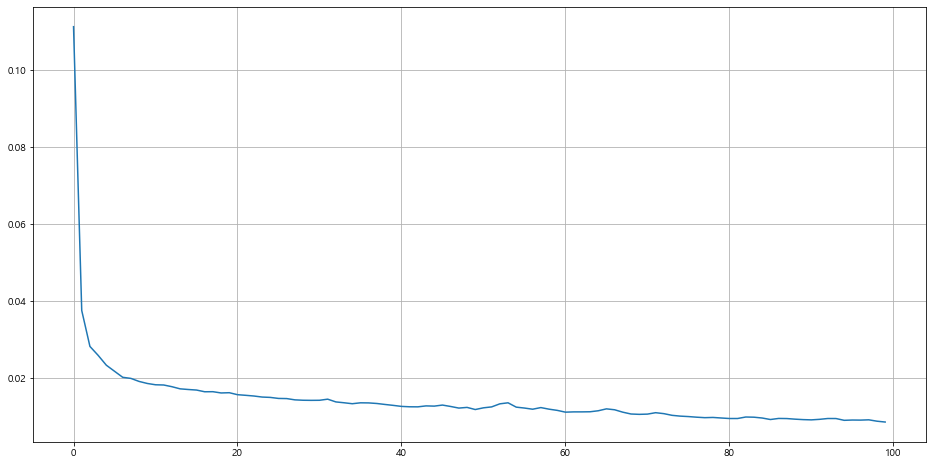

In [88]:
# convert the training history to a dataframe
history_df = pd.DataFrame(history.history)
# use Pandas native plot method
plt.figure(figsize=(16,8))
history_df['loss'].plot()
plt.grid()
plt.show()

In [78]:
visualizer(model, format="png", view=True)

In [81]:
!dir *.png

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: 8C8C-4820

 C:\Users\bzfor\PycharmProjects\project_pylib 디렉터리

2022-05-18  오후 04:20           507,966 graph.png
               1개 파일             507,966 바이트
               0개 디렉터리  148,899,819,520 바이트 남음


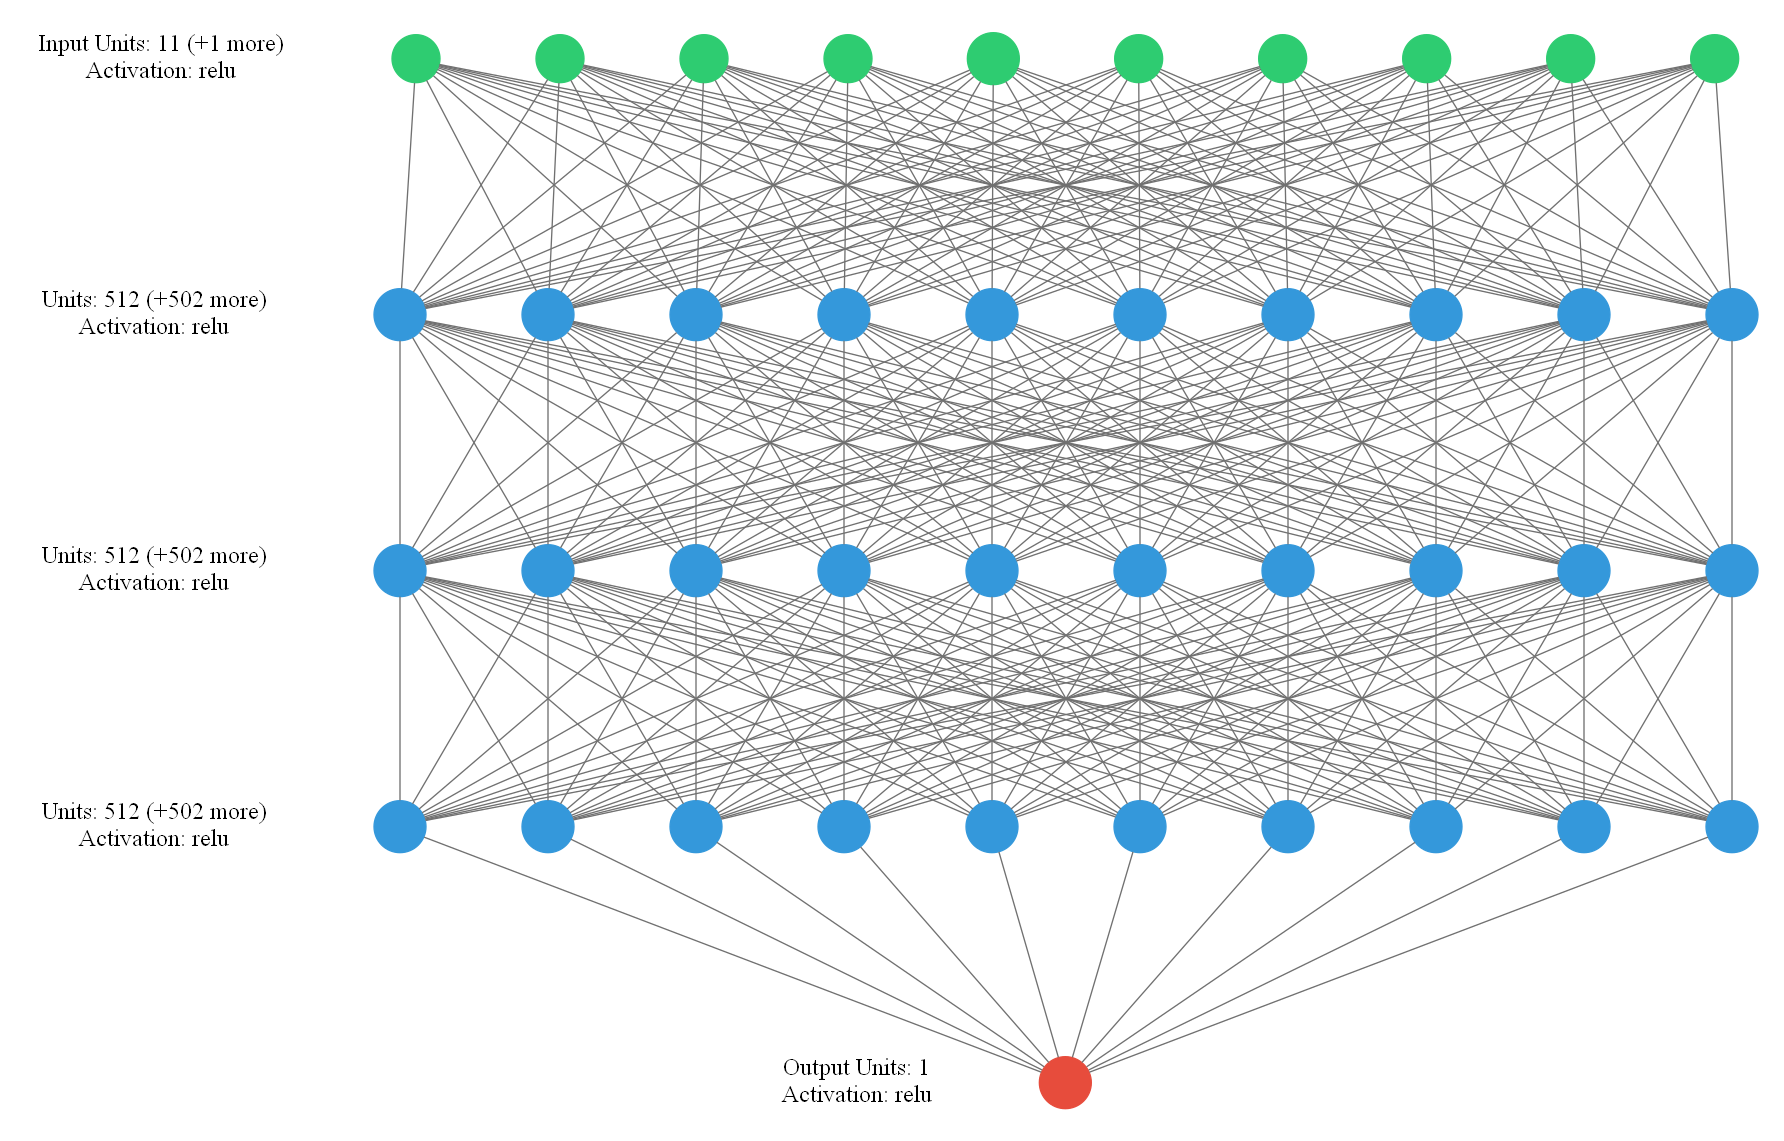

In [90]:
Image("graph.png")